In [169]:
pip install geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [170]:
# import the necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle

## Define upload function

In [182]:
def read_csv_to_dataframe(file_path):
    
    # cleaning the dataframe

    df = pd.read_csv(file_path, sep = ';', skiprows = 8)
    length = len(df)
    print("Currently checking: ", filepath)
    
    if 'NO3 [mg/l]' in df.columns:
        df = df[df['NO3 [mg/l]'].notna()]       

    if 'NO3 [mg/l] ( m Tiefe)' in df.columns:
        df = df[df['NO3 [mg/l] ( m Tiefe)'].notna()]
        df.rename(columns={'NO3 [mg/l] ( m Tiefe)': 'NO3 [mg/l]'}, inplace=True)
        
    if 'o-PO4-P [mg/l]' in df.columns:
        df.drop(['o-PO4-P [mg/l]'], axis = 1, inplace = True)
        
    if 'o-PO4-P [mg/l] ( m Tiefe)' in df.columns:
        df.drop(['o-PO4-P [mg/l] ( m Tiefe)'], axis = 1, inplace = True)
        

    df.set_index(pd.Index(range(len(df))), inplace = True)

    df['date_time'] = pd.to_datetime(df['Datum'])
    df['year'] = df['date_time'].dt.year
    df['month'] = df['date_time'].dt.month
    df['date'] = df['date_time'].dt.date
    df['year_month'] = df['date_time'].dt.to_period('M')
    
    
    df = df.drop(columns = ['Prüfstatus', 'Datum', 'date_time'])

    
    # extract the station coordinates that are in row 7 of csv

    skip1 = range(6)
    skip2 = range(8,length+9)
    skip_row_list = list(skip1) + list(skip2)
    df2 = pd.read_csv(file_path, sep = ';', skiprows = skip_row_list)
    easting = float(df2.columns[1])
    northing = float(df2.columns[3])

    # Add the coordinates to existing dataframe
    df["easting"] = easting
    df["northing"] = northing
    
    # Extract the station information
    skip3 = range(6,length+9)
    skip_row_list = (skip3)
    info = pd.read_csv(file_path, sep = ';', skiprows = skip_row_list)
    station_name = info.iloc[2,1]
    station_number = info.iloc[3,1]
    water_body = info.iloc[4,1]
    
    # Add station information to the dataframe
    df["station_name"] = station_name
    df["station_number"] = station_number
    df["water_body"] = water_body
    df[df.columns[0]] = df[df.columns[0]].apply(convert_to_float)
    
    
    return df


# convert concentration values from string to float
# replace '<BG' values to 0

def convert_to_float(value):
    if value.replace(',', '.').replace('.', '').isdigit():
        return float(value.replace(',', '.'))
    elif value == '< BG':             # Replace the <BG values by this value
        return 0.01

## Implement the upload function

In [172]:
# Folder path containing the CSV files
folder_path = r'J:\study_project\data'

# List to store DataFrames
dataframes_list = []

In [173]:
# loop through all the stations' csv files and save their information in dataframes

for filename in os.listdir(folder_path):
    if filename.endswith('csv'):
        filepath = os.path.join(folder_path, filename)
        
        dataframe = read_csv_to_dataframe(filepath)
        
        
        dataframes_list.append(dataframe)

# print the shape of stored dataframes for quick analysis

for i, df in enumerate(dataframes_list):
    print(f'Dataframe {i+1} : {df.shape}' )
    


Currently checking:  J:\study_project\data\8518_14.03.1879_23.11.2023_ezw_0_769f0dd8017943bbe249cdc257a1b86e.csv
Currently checking:  J:\study_project\data\8732_14.03.1879_23.11.2023_ezw_0_afdcc421153d62fd7e8372e8116fc495.csv
Currently checking:  J:\study_project\data\13516_14.03.1879_23.11.2023_ezw_0_efd65c67046c37990084dd58e8784203.csv
Currently checking:  J:\study_project\data\14224_14.03.1879_23.11.2023_ezw_0_346ba97f946a352572440d97280bbf10.csv
Currently checking:  J:\study_project\data\15123_14.03.1879_23.11.2023_ezw_0_d34bd3b717ba04ed5cc84cf9668a2a20.csv
Currently checking:  J:\study_project\data\15912_20.01.2021_08.12.2021_ezw_0_99e560fc3db63caca692080eefe44b91.csv
Currently checking:  J:\study_project\data\17828_14.03.1879_23.11.2023_ezw_0_1ba81cf2d214f46f4f31b06c5215fe48.csv
Currently checking:  J:\study_project\data\20496_14.03.1879_23.11.2023_ezw_0_6934787e780a40d34a001f82685c537f.csv
Currently checking:  J:\study_project\data\23018_11.01.2017_13.12.2017_ezw_0_54ab2368a6acc

Currently checking:  J:\study_project\data\114236_14.03.1879_23.11.2023_ezw_0_8d02a2f6d2c89310597168c949778dc7.csv
Currently checking:  J:\study_project\data\143099_19.01.2021_07.12.2021_ezw_0_94a5223cd1e3b8b2ab1da7b34fc5e3bb.csv
Currently checking:  J:\study_project\data\176396_20.01.2014_08.12.2016_ezw_0_23beb901f6836fb6b0ced525ca735c23.csv
Currently checking:  J:\study_project\data\176542_13.01.2016_12.12.2016_ezw_0_6b4d5aceb23368628d1c627e46dbd18b.csv
Currently checking:  J:\study_project\data\193320_11.01.2017_11.12.2019_ezw_0_23a3301ea5cd0cba3fd6fdcd869aa950.csv
Currently checking:  J:\study_project\data\213778_27.01.2020_14.12.2020_ezw_0_e64cbe585641ed863e4afbaefc425960.csv
Currently checking:  J:\study_project\data\2927_14.03.1879_23.11.2023_ezw_0_3e3ec0b9fb273983d96ae3044da898c0.csv
Currently checking:  J:\study_project\data\2939_14.03.1879_23.11.2023_ezw_0_438f77139e3924660556076556ffd4ee.csv
Currently checking:  J:\study_project\data\2971_14.03.1879_23.11.2023_ezw_0_4728f231

Currently checking:  J:\study_project\data\23588_14.03.1879_23.11.2023_ezw_0_5d2ee6e32b9e97e9078d207eed9d03d9.csv
Currently checking:  J:\study_project\data\96546_14.03.1879_23.11.2023_ezw_0_ce8d757199dc05fae7ea173c75cb173f.csv
Currently checking:  J:\study_project\data\96672_14.03.1879_23.11.2023_ezw_0_cf6b0c29544843f76dbc3b5930460c7e.csv
Currently checking:  J:\study_project\data\96982_14.03.1879_23.11.2023_ezw_0_12868c63a7e984173eb84c4981627136.csv
Currently checking:  J:\study_project\data\103246_14.03.1879_23.11.2023_ezw_0_35b4b8078e386cbc17ff4da30c0fe4fb.csv
Currently checking:  J:\study_project\data\105495_14.03.1879_23.11.2023_ezw_0_353f794cd88fb409e17901c92754724a.csv
Currently checking:  J:\study_project\data\105682_14.03.1879_23.11.2023_ezw_0_42763274edca1669f397b8227f577bdd.csv
Currently checking:  J:\study_project\data\105790_14.03.1879_23.11.2023_ezw_0_40780244e547de6703ad9c6c4c10a698.csv
Currently checking:  J:\study_project\data\106008_14.03.1879_23.11.2023_ezw_0_e5020c

Currently checking:  J:\study_project\data\12706_26.01.2015_17.12.2018_ezw_0_5c214629a438bba0deb4456bddfd62bb.csv
Currently checking:  J:\study_project\data\12872_14.03.1879_23.11.2023_ezw_0_3b9204161370da8a9f0ec4195a6615db.csv
Currently checking:  J:\study_project\data\13927_21.01.2019_02.12.2019_ezw_0_5c8dd8fd3aa297ba537f778655160de3.csv
Currently checking:  J:\study_project\data\14490_14.03.1879_23.11.2023_ezw_0_bfce8b2278bfcbe886c7d81a1acc515c.csv
Currently checking:  J:\study_project\data\15169_14.03.1879_23.11.2023_ezw_0_ad857c0b33b86bd37844a553d5c45252.csv
Currently checking:  J:\study_project\data\17618_14.03.1879_23.11.2023_ezw_0_42a4699cb395ae2840d192b7e76bde1d.csv
Currently checking:  J:\study_project\data\18318_28.01.2019_10.12.2019_ezw_0_15f2be811868d18fa9b4035fa827c953.csv
Currently checking:  J:\study_project\data\19226_13.01.2021_01.12.2021_ezw_0_545ecddcd9dc360d4dd50e3a80341af7.csv
Currently checking:  J:\study_project\data\19230_13.01.2021_01.12.2021_ezw_0_115a2083cd7

Currently checking:  J:\study_project\data\11557_14.03.1879_23.11.2023_ezw_0_61cafb0d21081fb539c8b4e32f9af04b.csv
Currently checking:  J:\study_project\data\11700_14.03.1879_23.11.2023_ezw_0_dee711bc45eda09b03d1967fc473244e.csv
Currently checking:  J:\study_project\data\12859_27.01.2020_14.12.2020_ezw_0_957870a98bbe604a9656b7f187c13524.csv
Currently checking:  J:\study_project\data\15253_14.03.1879_23.11.2023_ezw_0_c2ecd6f98b43b52ea6a100969a24ba9e.csv
Currently checking:  J:\study_project\data\16122_14.03.1879_23.11.2023_ezw_0_e531850bee772f4ced90db35505fae48.csv
Currently checking:  J:\study_project\data\16586_14.03.1879_23.11.2023_ezw_0_d41d5caecd8293aa2dc5938ac474da17.csv
Currently checking:  J:\study_project\data\17632_14.03.1879_23.11.2023_ezw_0_658f4def4516c3c128c5c6d7337920dd.csv
Currently checking:  J:\study_project\data\17760_14.03.1879_23.11.2023_ezw_0_16993f8d6df59ab1b919ed68632c0732.csv
Currently checking:  J:\study_project\data\17863_14.03.1879_23.11.2023_ezw_0_57c7b262efb

Currently checking:  J:\study_project\data\3226_14.03.1879_23.11.2023_ezw_0_cfb26ed1a76a486114901a1b185f6ec8.csv
Currently checking:  J:\study_project\data\4574_14.03.1879_23.11.2023_ezw_0_b128a1c3d291a4ff9988725c35456a66.csv
Currently checking:  J:\study_project\data\4761_14.03.1879_23.11.2023_ezw_0_4e94e57899458d4ff2b4c5f491dfa697.csv
Currently checking:  J:\study_project\data\5963_21.01.2020_09.12.2021_ezw_0_21fb9810a1daa37e953a6e690fa09541.csv
Currently checking:  J:\study_project\data\6237_14.03.1879_23.11.2023_ezw_0_5c1d7d8fad2a4042f3017e3e30b18111.csv
Currently checking:  J:\study_project\data\6591_14.03.1879_23.11.2023_ezw_0_05a45e90be35e6592731165b31a7e77f.csv
Currently checking:  J:\study_project\data\6949_14.03.1879_23.11.2023_ezw_0_3afa6fcb095650b2cbd551de43580315.csv
Currently checking:  J:\study_project\data\7254_14.03.1879_23.11.2023_ezw_0_5d94c63de930da76e1831d40a5ccc41e.csv
Currently checking:  J:\study_project\data\8319_28.01.2019_04.12.2019_ezw_0_7fa88b7d6c0424283fa1

Currently checking:  J:\study_project\data\95819_14.03.1879_23.11.2023_ezw_0_1d694ed649afd9ff3eabf2ec1d3fb0bc.csv
Currently checking:  J:\study_project\data\103160_14.03.1879_23.11.2023_ezw_0_c56cca5a3696150f9510fdf04595469d.csv
Currently checking:  J:\study_project\data\105347_14.03.1879_23.11.2023_ezw_0_8386c810a69dafbe8d2faaf868352d91.csv
Currently checking:  J:\study_project\data\105353_14.03.1879_23.11.2023_ezw_0_2eab993f6444d7ca18f6a2f9c29317a2.csv
Currently checking:  J:\study_project\data\113811_14.03.1879_23.11.2023_ezw_0_6bec96ef2f55b7d8c19a738eb7212358.csv
Currently checking:  J:\study_project\data\130394_14.03.1879_23.11.2023_ezw_0_7ca64fc02286f9fa63cbe8a3ef8e4eff.csv
Currently checking:  J:\study_project\data\139744_14.03.1879_23.11.2023_ezw_0_c83beb06a8d6babe8636eb1aa8b20926.csv
Currently checking:  J:\study_project\data\195630_14.03.1879_23.11.2023_ezw_0_e162e6da749f4ea3fc4bfbe902cdbd81.csv
Currently checking:  J:\study_project\data\204519_13.01.2021_15.12.2021_ezw_0_2b0

Currently checking:  J:\study_project\data\13376_07.03.2016_16.12.2019_ezw_0_22b4d55a0855fdee2fcb98b1c3fedc1d.csv
Currently checking:  J:\study_project\data\20316_14.03.1879_23.11.2023_ezw_0_dfe42ded816f75d95bbdd4deaab4f77c.csv
Currently checking:  J:\study_project\data\20879_23.04.2015_10.12.2018_ezw_0_88bae6df314eac46c1e6d3c32cdbe77b.csv
Currently checking:  J:\study_project\data\31117_20.03.2019_20.11.2019_ezw_0_2e846b2bb766a2bbf9b42bc7d5f80dea.csv
Currently checking:  J:\study_project\data\96513_14.03.1879_23.11.2023_ezw_0_e07f3596d6a3d39eacb59cf4d6222636.csv
Currently checking:  J:\study_project\data\96769_14.03.1879_23.11.2023_ezw_0_f4ea73b90e3fce0e427015e3778a9c9e.csv
Currently checking:  J:\study_project\data\103162_14.03.1879_23.11.2023_ezw_0_87e3432038c379b25468cfc4338fb335.csv
Currently checking:  J:\study_project\data\103294_14.03.1879_23.11.2023_ezw_0_a9d53d02f311564c1836a11f86c3d18d.csv
Currently checking:  J:\study_project\data\103344_14.03.1879_23.11.2023_ezw_0_31c36308

Currently checking:  J:\study_project\data\11868_14.03.1879_23.11.2023_ezw_0_d1ba4b0407838b75840906203dacd131.csv
Currently checking:  J:\study_project\data\12732_28.01.2019_04.12.2019_ezw_0_3f7a91f32a763fade817e9a0cd919b00.csv
Currently checking:  J:\study_project\data\13177_20.03.2019_20.11.2019_ezw_0_a239bface2ea53bfe27e2567ce405860.csv
Currently checking:  J:\study_project\data\13289_14.03.1879_23.11.2023_ezw_0_c927cdf345258ac624abe61a27db994a.csv
Currently checking:  J:\study_project\data\13313_14.03.1879_23.11.2023_ezw_0_21bfc46aff1eafe2b22abb433d9373e0.csv
Currently checking:  J:\study_project\data\14135_14.03.1879_23.11.2023_ezw_0_bdda1e4746a6e5627dfd1b0b7f46da0b.csv
Currently checking:  J:\study_project\data\14183_14.03.1879_23.11.2023_ezw_0_a176045304a189b7be8438d165488851.csv
Currently checking:  J:\study_project\data\14272_16.01.2017_09.12.2020_ezw_0_9716a5c824a3a08a15f9e30cbad114c3.csv
Currently checking:  J:\study_project\data\14751_14.03.1879_23.11.2023_ezw_0_72a51fdb725

Currently checking:  J:\study_project\data\6934_14.03.1879_23.11.2023_ezw_0_fd67f9eb1d877ad70fd79d7f963871e7.csv
Currently checking:  J:\study_project\data\8228_14.03.1879_23.11.2023_ezw_0_fa9756720fe992437ec6b2c9193da3e5.csv
Currently checking:  J:\study_project\data\8244_14.03.1879_23.11.2023_ezw_0_c3a82db5a096ee77b0d25f8350f9f7fe.csv
Currently checking:  J:\study_project\data\8328_15.02.2016_17.12.2019_ezw_0_7f7bedabcbce8c7b776e44181c410375.csv
Currently checking:  J:\study_project\data\8582_01.02.2016_03.12.2019_ezw_0_07d2405b1e6428a5c4ae1c7488f6f087.csv
Currently checking:  J:\study_project\data\8672_14.03.1879_23.11.2023_ezw_0_f941bba0674d7bcbe1512492ac487888.csv
Currently checking:  J:\study_project\data\8974_14.03.1879_23.11.2023_ezw_0_ba747b6d0a93e13cc0e995a7136d4bd1.csv
Currently checking:  J:\study_project\data\9110_14.03.1879_23.11.2023_ezw_0_e98a8d72d1a9325a57e3a56e9646b2da.csv
Currently checking:  J:\study_project\data\9520_14.03.1879_23.11.2023_ezw_0_e18fa7a44f7f0951e39d

Currently checking:  J:\study_project\data\206390_08.01.2019_01.12.2021_ezw_0_2c26a192ec27e6ba2e38647f5c01d35f.csv
Currently checking:  J:\study_project\data\2272_14.03.1879_23.11.2023_ezw_0_a2e3e45823d4e24b7abee356e0c8f09e.csv
Currently checking:  J:\study_project\data\2398_14.03.1879_23.11.2023_ezw_0_2ff184745df164562f6a4fb43e2e36b6.csv
Currently checking:  J:\study_project\data\4643_14.03.1879_23.11.2023_ezw_0_3f2e9d7a26976b329e4f57646b35fb17.csv
Currently checking:  J:\study_project\data\4751_14.03.1879_23.11.2023_ezw_0_9b76a0035ce0eb5f370c000897c13e4f.csv
Currently checking:  J:\study_project\data\5064_14.03.1879_23.11.2023_ezw_0_6b172e65b5e3694b72ad2b3e8b281772.csv
Currently checking:  J:\study_project\data\5669_14.03.1879_23.11.2023_ezw_0_db7b04e80fe592638ac92754476a33f4.csv
Currently checking:  J:\study_project\data\7712_14.03.1879_23.11.2023_ezw_0_f5a000a31cd52d01d559a8aad4799a60.csv
Currently checking:  J:\study_project\data\9243_26.01.2021_01.12.2021_ezw_0_8ff40c2d0f7eb022fb

Currently checking:  J:\study_project\data\103410_14.03.1879_23.11.2023_ezw_0_25f10d93f66dd20634ae11a170e97089.csv
Currently checking:  J:\study_project\data\105480_14.03.1879_23.11.2023_ezw_0_6c9c737a54ec4c015eba840b93d8668f.csv
Currently checking:  J:\study_project\data\105669_14.03.1879_23.11.2023_ezw_0_51142d85a916bc4833eb8389e51dbfa3.csv
Currently checking:  J:\study_project\data\105675_14.03.1879_23.11.2023_ezw_0_d5c0bd827a2db2e79cd44c2ad8ea17e0.csv
Currently checking:  J:\study_project\data\108317_14.03.1879_23.11.2023_ezw_0_a96b2a391c23ada566e3486b013ef5c7.csv
Currently checking:  J:\study_project\data\111606_12.01.2016_10.12.2019_ezw_0_acf5a341f5497a53633ac42a3f53daee.csv
Currently checking:  J:\study_project\data\113815_14.03.1879_23.11.2023_ezw_0_e7e94e59211ae2f6f78a0c2f3eba8e31.csv
Currently checking:  J:\study_project\data\115858_14.03.1879_23.11.2023_ezw_0_adcbb419ffbbdd46f953c197a8207085.csv
Currently checking:  J:\study_project\data\123623_14.03.1879_23.11.2023_ezw_0_76

Currently checking:  J:\study_project\data\105843_14.03.1879_23.11.2023_ezw_0_f796244a4510f8c933680f827f52a907.csv
Currently checking:  J:\study_project\data\105892_14.03.1879_23.11.2023_ezw_0_7fe9f10401eb4bf4a1115abf83766122.csv
Currently checking:  J:\study_project\data\114508_14.03.1879_23.11.2023_ezw_0_4f890e869f1d8f0fca12beecdbac1a06.csv
Currently checking:  J:\study_project\data\121167_09.01.2018_10.12.2018_ezw_0_fe223972910f533330177af229d5e2b4.csv
Currently checking:  J:\study_project\data\128971_14.03.1879_23.11.2023_ezw_0_b4a4ac7793b82ea97675cf51d432d03f.csv
Currently checking:  J:\study_project\data\131156_14.03.1879_23.11.2023_ezw_0_4fa476acaf74209b365dedad53f48144.csv
Currently checking:  J:\study_project\data\131157_28.01.2020_16.12.2020_ezw_0_9eb65b0d441f400f4b198a083ae63e98.csv
Currently checking:  J:\study_project\data\131158_14.03.1879_23.11.2023_ezw_0_5eed7f9b845fb412fddf99d2a601d72e.csv
Currently checking:  J:\study_project\data\136342_14.03.1879_23.11.2023_ezw_0_13

## Check the edited data

In [174]:
check_dataframe = dataframes_list[82]
print(type(check_dataframe.iloc[0,0]))
check_dataframe

<class 'numpy.float64'>


,NO3 [mg/l],year,month,date,year_month,easting,northing,station_name,station_number,water_body
0,3.1,2000,1,2000-01-11,2000-01,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
1,3.1,2000,1,2000-01-25,2000-01,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
2,3.1,2000,2,2000-02-08,2000-02,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
3,3.1,2000,2,2000-02-22,2000-02,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
4,3.1,2000,3,2000-03-08,2000-03,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
...,...,...,...,...,...,...,...,...,...,...
459,1.8,2021,8,2021-08-04,2021-08,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
460,1.9,2021,9,2021-09-06,2021-09,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
461,2.0,2021,10,2021-10-04,2021-10,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech
462,2.5,2021,11,2021-11-04,2021-11,627474.0,5268880.0,"Füssen, Magnustritt",2971,Lech


In [175]:
# save the list variable
filepath = "stations_dataframes_list"
with open(filepath, 'wb') as file:
    pickle.dump(dataframes_list, file)

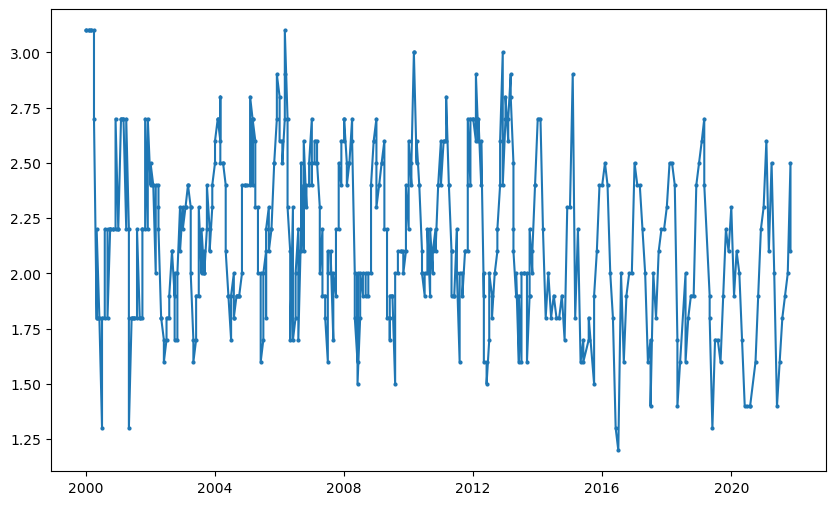

In [176]:
# plot the time series of the selected dataframe

plt.figure(figsize=(10,6))
plt.plot(check_dataframe['year_month'].dt.to_timestamp(), check_dataframe['NO3 [mg/l]'],marker = 'o', markersize = 2)

In [177]:
# check if downloaded wrong data by mistake
# because by default the data portal downloads water temperature

check_list = []
station_name = []
for i, dfc in enumerate(dataframes_list):
    if "Wassertemp.(vor Ort) [°C]" in dfc.columns:
        check_list.append(dfc["station_number"].iloc[0])
        station_name.append(dfc["station_name"].iloc[0])
        
check_list

[]

## Plot stations

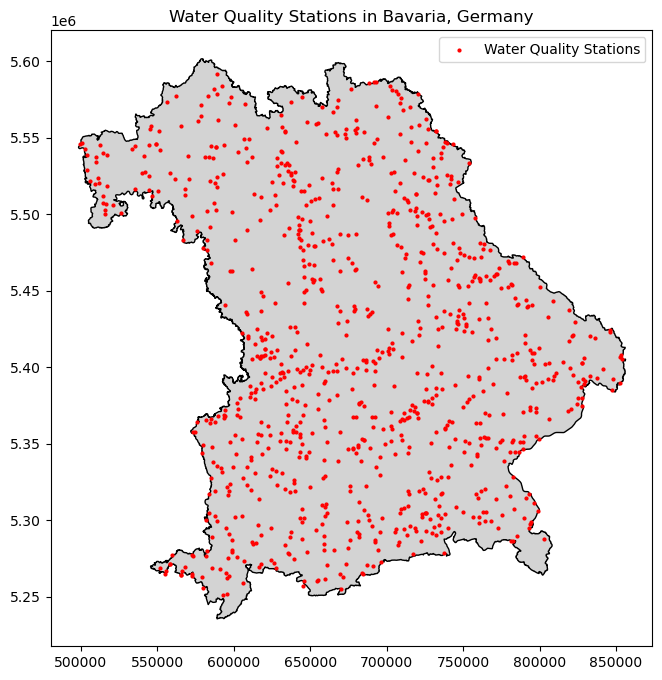

In [178]:
# Plot the stations on a map

easting_list = []
northing_list = []
for ldf in dataframes_list:
    easting = ldf.iloc[0,5]
    easting_list.append(easting)
    northing = ldf.iloc[0,6]
    northing_list.append(northing)

crs = 'epsg:25832'    
gdf = gpd.GeoDataFrame(geometry = gpd.points_from_xy(easting_list, northing_list), crs = crs)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title('Water Quality Stations in Bavaria, Germany')

# Read the Bavaria boundary shapefile
bavaria_boundary = gpd.read_file(r"J:\study_project\geoBoundaries-DEU-ADM1-all\bavaria_outline.shp")

# Plot Bavaria boundary
bavaria_boundary.to_crs(crs).plot(ax=ax, color='lightgray', edgecolor='black')

# Plot water quality stations
gdf.to_crs(crs).plot(ax=ax, color='red', markersize=4, label='Water Quality Stations')

plt.legend()
plt.show()

## Convert NO3 to NO3-N

In [179]:
# change NO3 concentration to NO3-N values

NO3_N_dfs = [df.copy() for i,df in enumerate(dataframes_list)]

for i in range(len(NO3_N_df_list)):
    NO3_N_dfs[i].iloc[:,0] = round(NO3_N_dfs[i].iloc[:,0]*0.226, 3)
    NO3_N_dfs[i].rename(columns={'NO3 [mg/l]': 'NO3-N [mg/l]'}, inplace=True)

In [1]:
check_dataframe = NO3_N_dfs[82]
print(type(check_dataframe.iloc[0,0]))
check_dataframe

NameError: name 'NO3_N_dfs' is not defined

In [181]:
# save the list variable
filepath = "NO3_N_dfs"
with open(filepath, 'wb') as file:
    pickle.dump(NO3_N_dfs, file)